In [38]:
# Import necessary libraries and load the dataset
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm 
import seaborn as sns
import matplotlib.pyplot as plt

# Load the heart.csv dataset
heart_data = pd.read_csv('heart.csv')

# Display basic information about the dataset
heart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [39]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


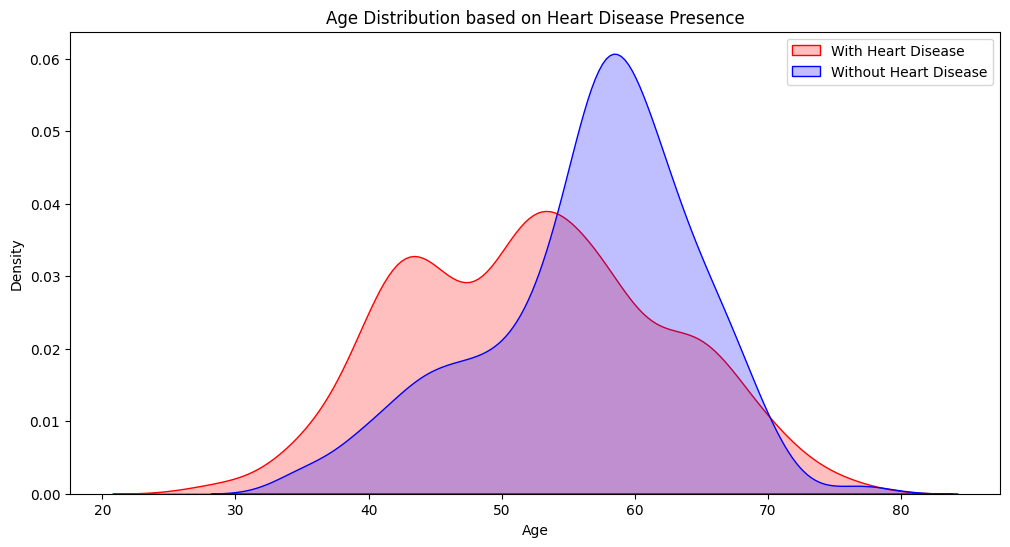

In [40]:
# Splitting the age data based on the target variable
age_with_disease = heart_data[heart_data['target'] == 1]['age']
age_without_disease = heart_data[heart_data['target'] == 0]['age']

# Plotting the age distribution for both groups
plt.figure(figsize=(12, 6))

sns.kdeplot(age_with_disease, fill=True, label='With Heart Disease', color='r')
sns.kdeplot(age_without_disease, fill=True, label='Without Heart Disease', color='b')

plt.title('Age Distribution based on Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()


<Figure size 800x600 with 0 Axes>

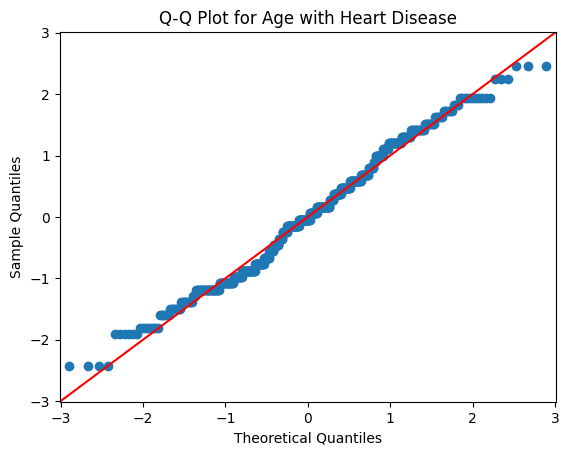

<Figure size 800x600 with 0 Axes>

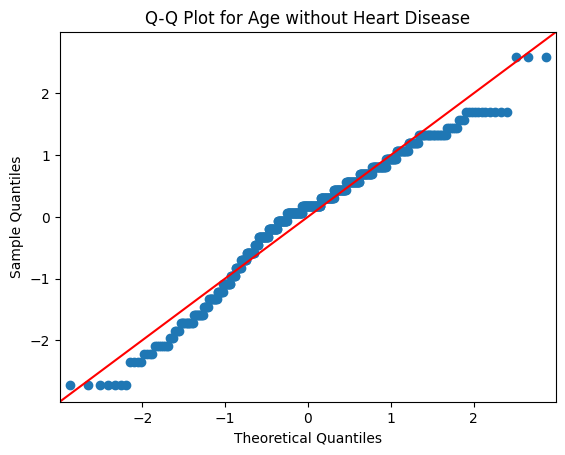

In [41]:
# Plot larger Q-Q plots for better visibility

# Q-Q plot for age with heart disease
plt.figure(figsize=(8, 6))
sm.qqplot(age_with_disease, line='45', fit=True)
plt.title('Q-Q Plot for Age with Heart Disease')
plt.show()

# Q-Q plot for age without heart disease
plt.figure(figsize=(8, 6))
sm.qqplot(age_without_disease, line='45', fit=True)
plt.title('Q-Q Plot for Age without Heart Disease')
plt.show()


In [42]:
# Check for Homoscedasticity using the Levene's Test
levene_test_result = stats.levene(age_with_disease, age_without_disease)

levene_test_result


LeveneResult(statistic=30.83786928129634, pvalue=3.574862161939592e-08)

In [43]:
# Perform the t-test assuming unequal variances
t_test_result = stats.ttest_ind(age_with_disease, age_without_disease, equal_var=False)

t_test_result


Ttest_indResult(statistic=-7.57436830024299, pvalue=8.180248047398552e-14)

In [44]:
wilcoxon_test_result = stats.ranksums(age_with_disease, age_without_disease, alternative='two-sided')

wilcoxon_test_result

RanksumsResult(statistic=-7.685262244508298, pvalue=1.5268390945395168e-14)